### **<font style="color:rgb(134,19,348)"> Import the Libraries</font>**

Let's start by importing the required libraries.

In [2]:
# Install mediapipe
%pip install mediapipe

# Import necessary libraries
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt




Note: you may need to restart the kernel to use updated packages.


In [1]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

## **<font style="color:rgb(134,19,348)">Initialize the Pose Detection Model</font>**



In [3]:
# Initializing mediapipe pose class.
mp_pose = mp.solutions.pose

# Setting up the Pose function.
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)

# Initializing mediapipe drawing class, useful for annotation.
mp_drawing = mp.solutions.drawing_utils

## **<font style="color:rgb(134,19,348)">Images</font>**



Note: you may need to restart the kernel to use updated packages.


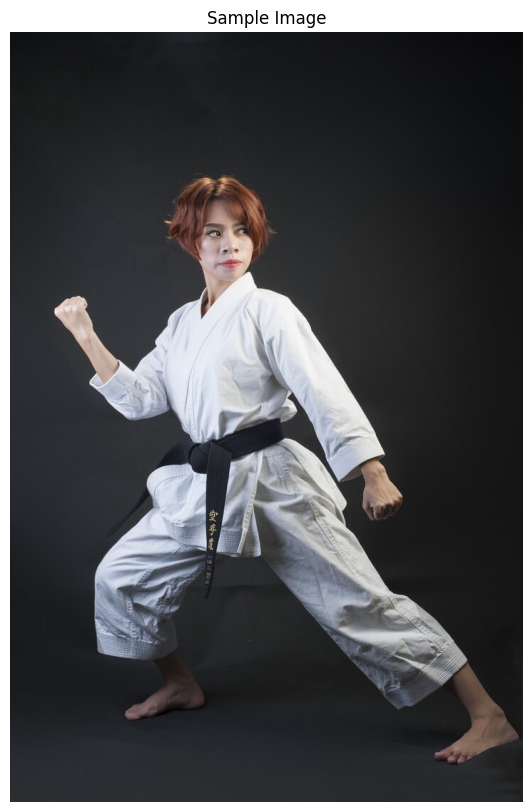

In [5]:
%pip install requests
import requests
# Function to read an image from a URL
def read_image_from_url(url1):
    response = requests.get(url1)
    image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
    return image

    # GitHub URL of the image
url1 = 'https://github.com/toanmolsharma/newprojecty/raw/main/media/sample.jpg'

# Read the image from the URL
sample_img = read_image_from_url(url1)

# Read an image from the specified path.
#sample_img = cv2.imread('media/sample.jpg')

# Specify a size of the figure.
plt.figure(figsize = [10, 10])

# Display the sample image, also convert BGR to RGB for display.
plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

## **<font style="color:rgb(134,19,348)">Perform Pose Detection</font>**

In [6]:
# Perform pose detection after converting the image into RGB format.
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

# Check if any landmarks are found.
if results.pose_landmarks:

    # Iterate two times as we only want to display first two landmarks.
    for i in range(2):

        # Display the found normalized landmarks.
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')

NOSE:
x: 0.42638272
y: 0.282518327
z: -0.56780237
visibility: 1

LEFT_EYE_INNER:
x: 0.435253739
y: 0.262873054
z: -0.531518161
visibility: 0.999999881



d:\phyton playground\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Now we will convert the two normalized landmarks displayed above into their original scale by using the width and height of the  image.

In [7]:
# Retrieve the height and width of the sample image.
image_height, image_width, _ = sample_img.shape

# Check if any landmarks are found.
if results.pose_landmarks:

    # Iterate two times as we only want to display first two landmark.
    for i in range(2):

        # Display the found landmarks after converting them into their original scale.
        print(f'{mp_pose.PoseLandmark(i).name}:')
        print(f'x: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x * image_width}')
        print(f'y: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y * image_height}')
        print(f'z: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z * image_width}')
        print(f'visibility: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')

NOSE:
x: 306.56917601823807
y: 305.1197934150696
z: -408.2499037384987
visibility: 1.0

LEFT_EYE_INNER:
x: 312.94743859767914
y: 283.90289783477783
z: -382.1615579724312
visibility: 0.9999998807907104



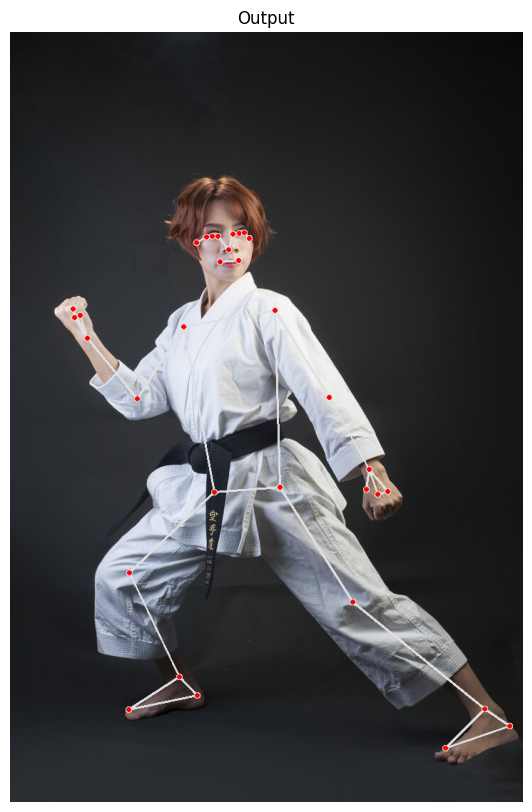

In [8]:
# Create a copy of the sample image to draw landmarks on.
img_copy = sample_img.copy()

# Check if any landmarks are found.
if results.pose_landmarks:

    # Draw Pose landmarks on the sample image.
    mp_drawing.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)

    # Specify a size of the figure.
    fig = plt.figure(figsize = [10, 10])

    # Display the output image with the landmarks drawn, also convert BGR to RGB for display.
    plt.title("Output");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()

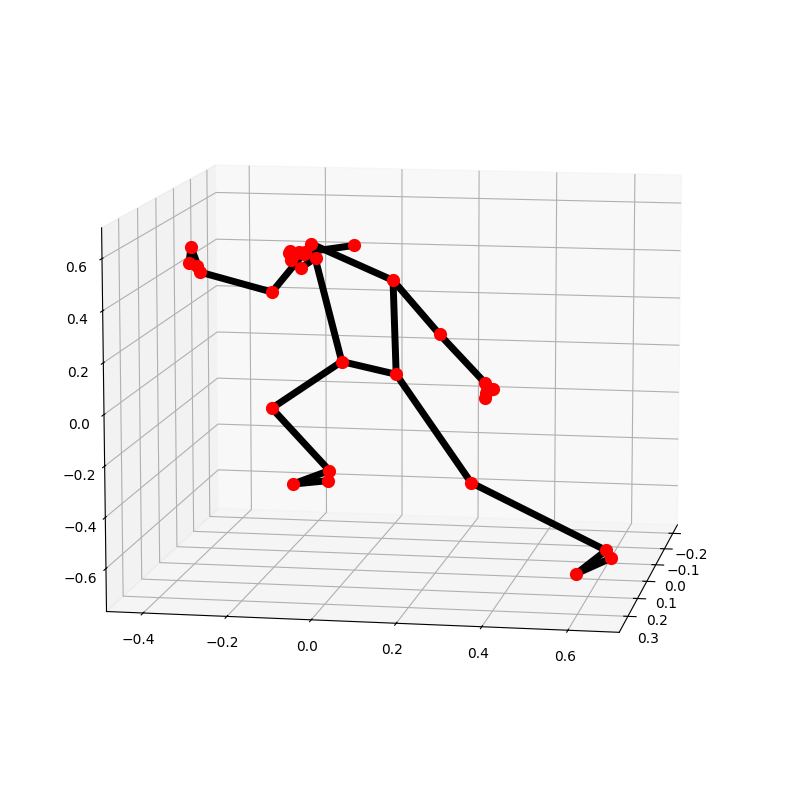

In [9]:
# Plot Pose landmarks in 3D.
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

### **<font style="color:rgb(134,19,348)">Create a Pose Detection Function</font>**

Now we will put all this together to create a function that will perform pose detection on an image and will visualize the results or return the results depending upon the passed arguments.

In [11]:
def detectPose(image, pose, display=True):
    '''
    This function performs pose detection on an image.
    Args:
        image: The input image with a prominent person whose pose landmarks needs to be detected.
        pose: The pose setup function required to perform the pose detection.
        display: A boolean value that is if set to true the function displays the original input image, the resultant image,
                 and the pose landmarks in 3D plot and returns nothing.
    Returns:
        output_image: The input image with the detected pose landmarks drawn.
        landmarks: A list of detected landmarks converted into their original scale.
    '''

    # Create a copy of the input image.
    output_image = image.copy()

    # Convert the image from BGR into RGB format.
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform the Pose Detection.
    results = pose.process(imageRGB)

    # Retrieve the height and width of the input image.
    height, width, _ = image.shape

    # Initialize a list to store the detected landmarks.
    landmarks = []

    # Check if any landmarks are detected.
    if results.pose_landmarks:

        # Draw Pose landmarks on the output image.
        mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS)

        # Iterate over the detected landmarks.
        for landmark in results.pose_landmarks.landmark:

            # Append the landmark into the list.
            landmarks.append((int(landmark.x * width), int(landmark.y * height),
                                  (landmark.z * width)))

    # Check if the original input image and the resultant image are specified to be displayed.
    if display:

        # Display the original input image and the resultant image.
        plt.figure(figsize=[22,22])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');

        # Also Plot the Pose landmarks in 3D.
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

    # Otherwise
    else:

        # Return the output image and the found landmarks.
        return output_image, landmarks

Now we will utilize the function created above to perform pose detection on a few sample images and display the results.

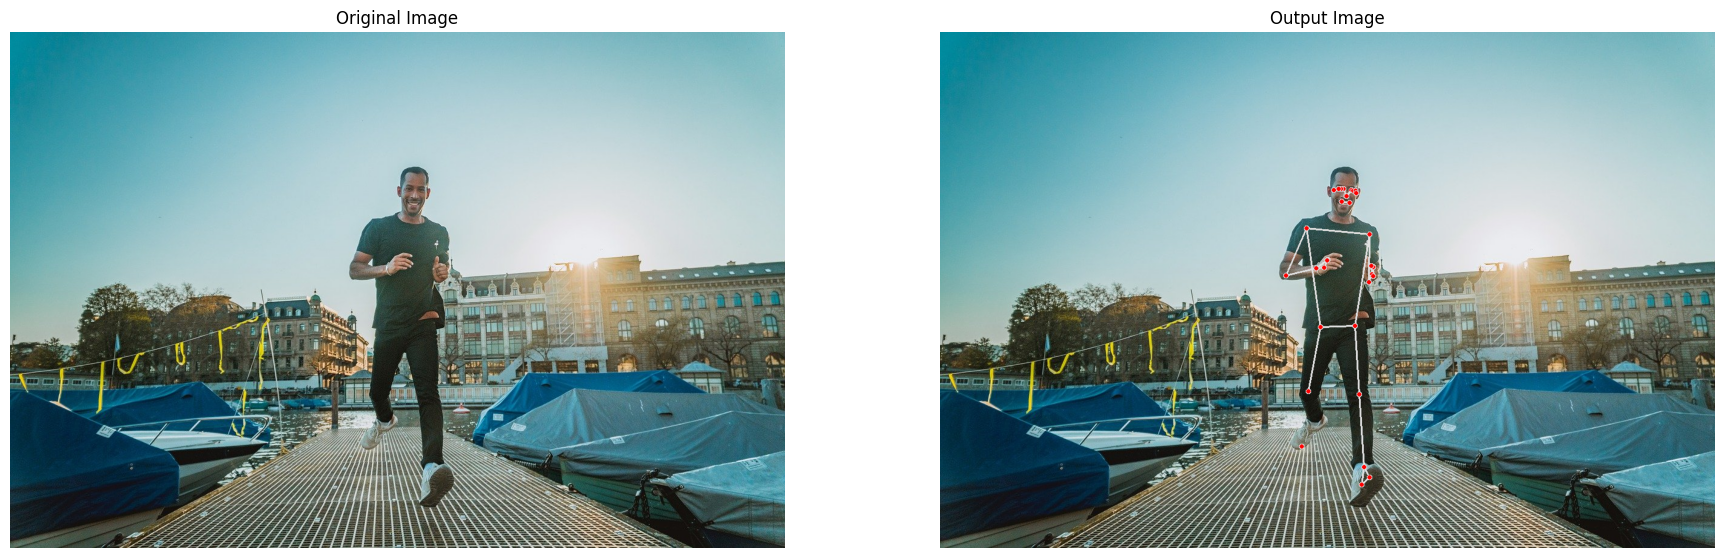

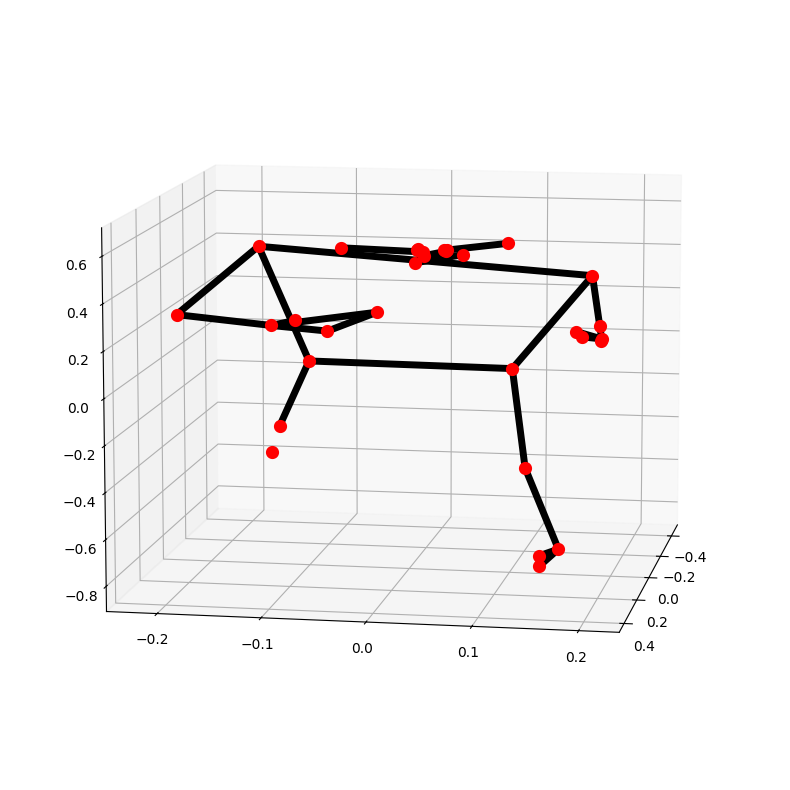

In [12]:
# Read another sample image and perform pose detection on it.
# GitHub URL of the image
url2 = 'https://github.com/toanmolsharma/newprojecty/raw/main/media/sample1.jpg'

# Read the image from the URL
sample_img = read_image_from_url(url2)
detectPose(sample_img, pose, display=True)

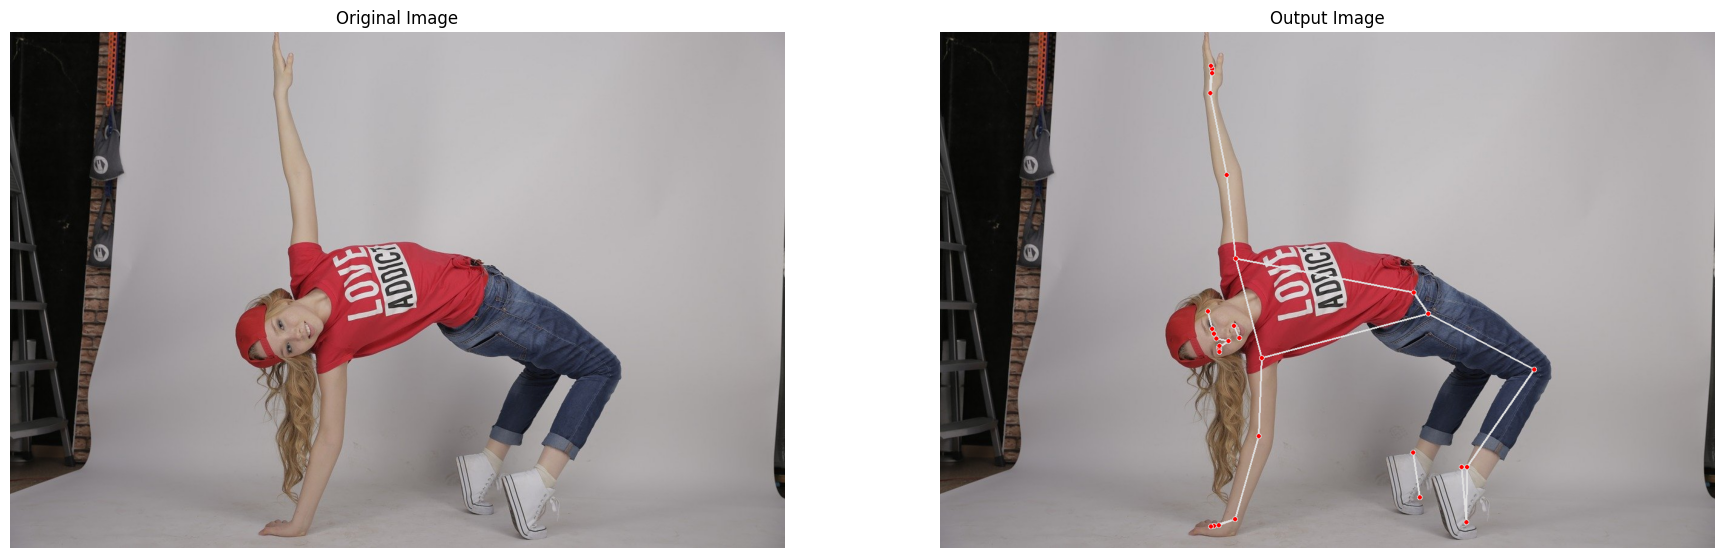

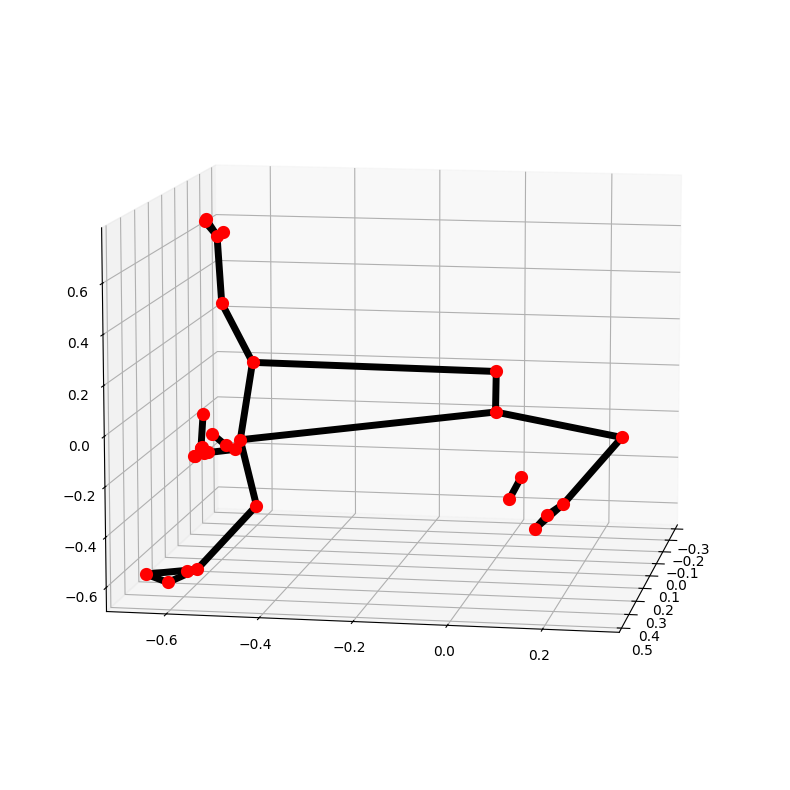

In [13]:
 #GitHub URL of the image
url3 = 'https://github.com/toanmolsharma/newprojecty/raw/main/media/sample2.jpg'

# Read the image from the URL
sample_img1 = read_image_from_url(url3)
detectPose(sample_img1, pose, display=True)

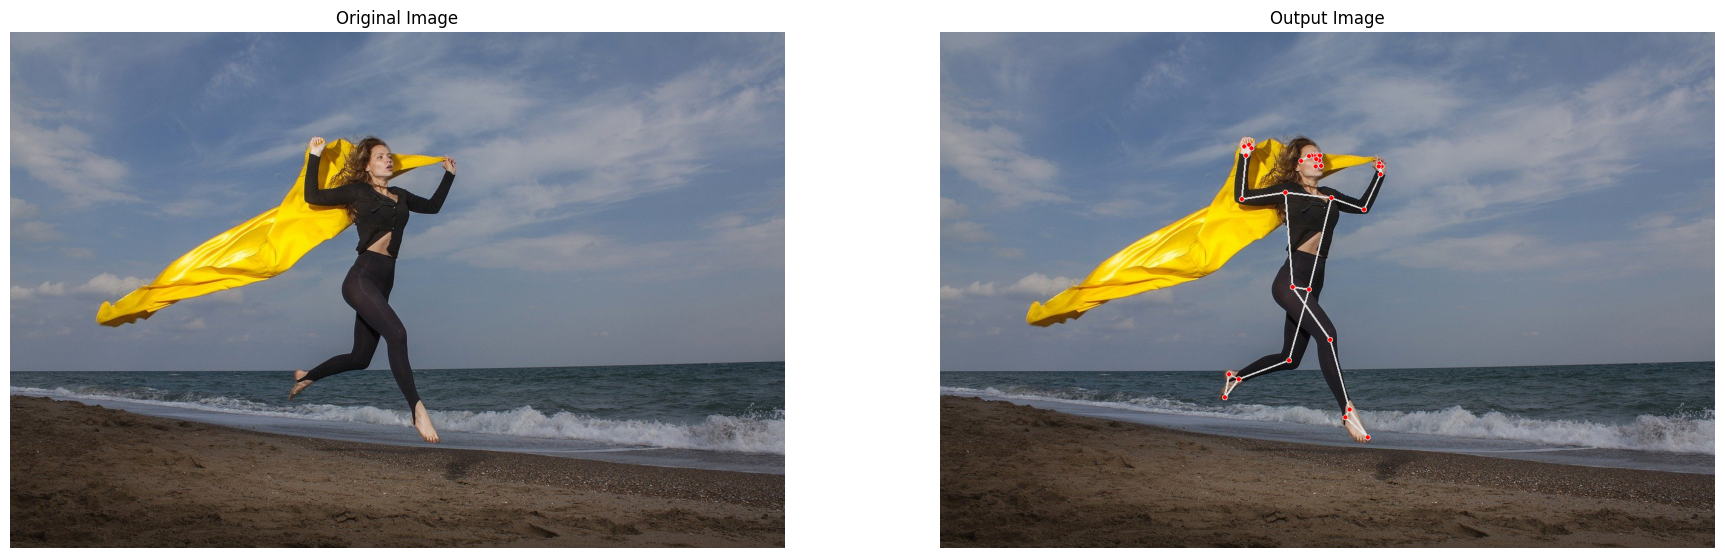

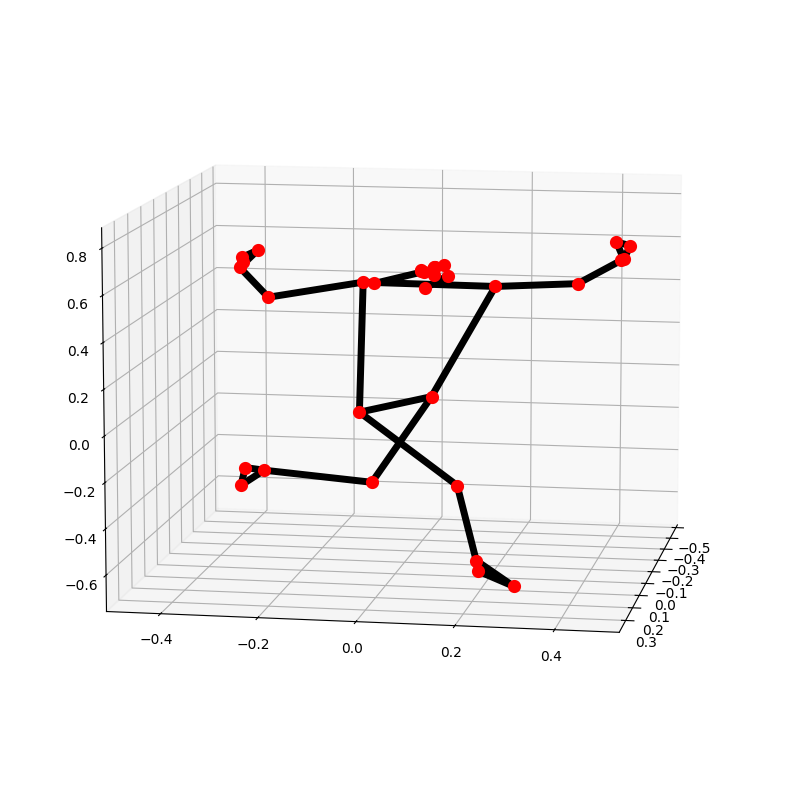

In [14]:
# GitHub URL of the image
url4 = 'https://github.com/toanmolsharma/newprojecty/raw/main/media/sample3.jpg'

# Read the image from the URL
sample_img2 = read_image_from_url(url4)
detectPose(sample_img2, pose, display=True)

### **<font style="color:rgb(134,19,348)">Pose Detection On Real-Time Webcam Feed/Video</font>**


In [15]:
# Setup Pose function for video.
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, model_complexity=1)

# Initialize the VideoCapture object to read from the webcam.
video = cv2.VideoCapture(1)

# Create named window for resizing purposes
cv2.namedWindow('Pose Detection', cv2.WINDOW_NORMAL)


# Initialize the VideoCapture object to read from a video stored in the disk.
#video = cv2.VideoCapture('media/running.mp4')

# Set video camera size
video.set(3,1280)
video.set(4,960)

# Initialize a variable to store the time of the previous frame.
time1 = 0

# Iterate until the video is accessed successfully.
while video.isOpened():

    # Read a frame.
    ok, frame = video.read()

    # Check if frame is not read properly.
    if not ok:

        # Break the loop.
        break

    # Flip the frame horizontally for natural (selfie-view) visualization.
    frame = cv2.flip(frame, 1)

    # Get the width and height of the frame
    frame_height, frame_width, _ =  frame.shape

    # Resize the frame while keeping the aspect ratio.
    frame = cv2.resize(frame, (int(frame_width * (640 / frame_height)), 640))

    # Perform Pose landmark detection.
    frame, _ = detectPose(frame, pose_video, display=False)

    # Set the time for this frame to the current time.
    time2 = time()

    # Check if the difference between the previous and this frame time > 0 to avoid division by zero.
    if (time2 - time1) > 0:

        # Calculate the number of frames per second.
        frames_per_second = 1.0 / (time2 - time1)

        # Write the calculated number of frames per second on the frame.
        cv2.putText(frame, 'FPS: {}'.format(int(frames_per_second)), (10, 30),cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 3)

    # Update the previous frame time to this frame time.
    # As this frame will become previous frame in next iteration.
    time1 = time2

    # Display the frame.
    cv2.imshow('Pose Detection', frame)

    # Wait until a key is pressed.
    # Retreive the ASCII code of the key pressed
    k = cv2.waitKey(1) & 0xFF

    # Check if 'ESC' is pressed.
    if(k == 27):

        # Break the loop.
        break

# Release the VideoCapture object.
video.release()

# Close the windows.
cv2.destroyAllWindows()

Cool! so it works great on the videos too. The model is pretty fast and accurate.

## **<font style="color:rgb(134,19,348)">Pose Classification with Angle Heuristics</font>**


### **<font style="color:rgb(134,19,348)">Create a Function to Calculate Angle between Landmarks</font>**


In [16]:
def calculateAngle(landmark1, landmark2, landmark3):
    '''
    This function calculates angle between three different landmarks.
    Args:
        landmark1: The first landmark containing the x,y and z coordinates.
        landmark2: The second landmark containing the x,y and z coordinates.
        landmark3: The third landmark containing the x,y and z coordinates.
    Returns:
        angle: The calculated angle between the three landmarks.

    '''

    # Get the required landmarks coordinates.
    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3

    # Calculate the angle between the three points
    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))

    # Check if the angle is less than zero.
    if angle < 0:

        # Add 360 to the found angle.
        angle += 360

    # Return the calculated angle.
    return angle

In [17]:
# Calculate the angle between the three landmarks.
angle = calculateAngle((558, 326, 0), (642, 333, 0), (718, 321, 0))

# Display the calculated angle.
print(f'The calculated angle is {angle}')

The calculated angle is 166.26373169437744


### **<font style="color:rgb(134,19,348)">Create a Function to Perform Pose Classification</font>**


In [18]:
def classifyPose(landmarks, output_image, display=False):
    '''
    This function classifies yoga poses depending upon the angles of various body joints.
    Args:
        landmarks: A list of detected landmarks of the person whose pose needs to be classified.
        output_image: A image of the person with the detected pose landmarks drawn.
        display: A boolean value that is if set to true the function displays the resultant image with the pose label
        written on it and returns nothing.
    Returns:
        output_image: The image with the detected pose landmarks drawn and pose label written.
        label: The classified pose label of the person in the output_image.

    '''

    # Initialize the label of the pose. It is not known at this stage.
    label = 'Unknown Pose'

    # Specify the color (Red) with which the label will be written on the image.
    color = (0, 0, 255)

    # Calculate the required angles.
    #----------------------------------------------------------------------------------------------------------------

    # Get the angle between the left shoulder, elbow and wrist points.
    left_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])

    # Get the angle between the right shoulder, elbow and wrist points.
    right_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value])

    # Get the angle between the left elbow, shoulder and hip points.
    left_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])

    # Get the angle between the right hip, shoulder and elbow points.
    right_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value])

    # Get the angle between the left hip, knee and ankle points.
    left_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])

    # Get the angle between the right hip, knee and ankle points
    right_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])

    #----------------------------------------------------------------------------------------------------------------
    # Check for Five-Pointed Star Pose
    if abs(landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value][1] - landmarks[mp_pose.PoseLandmark.LEFT_HIP.value][1]) < 100 and \
       abs(landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value][1] - landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value][1]) < 100 and \
       abs(landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value][0] - landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value][0]) > 200 and \
       abs(landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value][0] - landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value][0]) > 200:
        label = "Five-Pointed Star Pose"  
        
    # Check if it is the warrior II pose or the T pose.
    # As for both of them, both arms should be straight and shoulders should be at the specific angle.
    #----------------------------------------------------------------------------------------------------------------

    # Check if the both arms are straight.
    if left_elbow_angle > 165 and left_elbow_angle < 195 and right_elbow_angle > 165 and right_elbow_angle < 195:

        # Check if shoulders are at the required angle.
        if left_shoulder_angle > 80 and left_shoulder_angle < 110 and right_shoulder_angle > 80 and right_shoulder_angle < 110:

    # Check if it is the warrior II pose.
    #----------------------------------------------------------------------------------------------------------------

            # Check if one leg is straight.
            if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:

                # Check if the other leg is bended at the required angle.
                if left_knee_angle > 90 and left_knee_angle < 120 or right_knee_angle > 90 and right_knee_angle < 120:

                    # Specify the label of the pose that is Warrior II pose.
                    label = 'Warrior II Pose'

    #----------------------------------------------------------------------------------------------------------------

    # Check if it is the T pose.
    #----------------------------------------------------------------------------------------------------------------

            # Check if both legs are straight
            if left_knee_angle > 160 and left_knee_angle < 195 and right_knee_angle > 160 and right_knee_angle < 195:

                # Specify the label of the pose that is tree pose.
                label = 'T Pose'
    
    #----------------------------------------------------------------------------------------------------------------

    # Check if it is the tree pose.
    #----------------------------------------------------------------------------------------------------------------

    # Check if one leg is straight
    if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:

        # Check if the other leg is bended at the required angle.
        if left_knee_angle > 315 and left_knee_angle < 335 or right_knee_angle > 25 and right_knee_angle < 45:

            # Specify the label of the pose that is tree pose.
            label = 'Tree Pose'
    
    # Check for Upward Salute Pose
    if abs(landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value][0] - landmarks[mp_pose.PoseLandmark.LEFT_HIP.value][0]) < 100 and \
       abs(landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value][0] - landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value][0]) < 100 and \
       landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value][1] < landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value][1] and \
       landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value][1] < landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value][1] and \
       abs(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value][1] - landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value][1]) < 50:
        label = "Upward Salute Pose"

   # Check for Hands Under Feet Pose
    if landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value][1] > landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value][1] and \
       landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value][1] > landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value][1] and \
       abs(landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value][0] - landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value][0]) < 50 and \
       abs(landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value][0] - landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value][0]) < 50:
        label = "Hands Under Feet Pose"      
        
       
    #----------------------------------------------------------------------------------------------------------------

    # Check if the pose is classified successfully
    if label != 'Unknown Pose':

        # Update the color (to green) with which the label will be written on the image.
        color = (0, 255, 0)

    # Write the label on the output image.
    cv2.putText(output_image, label, (10, 30),cv2.FONT_HERSHEY_PLAIN, 2, color, 2)

    # Check if the resultant image is specified to be displayed.
    if display:

        # Display the resultant image.
        plt.figure(figsize=[10,10])
        plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');

    else:

        # Return the output image and the classified label.
        return output_image, label

## **<font style="color:rgb(134,19,348)">Warrior II Pose</font>**


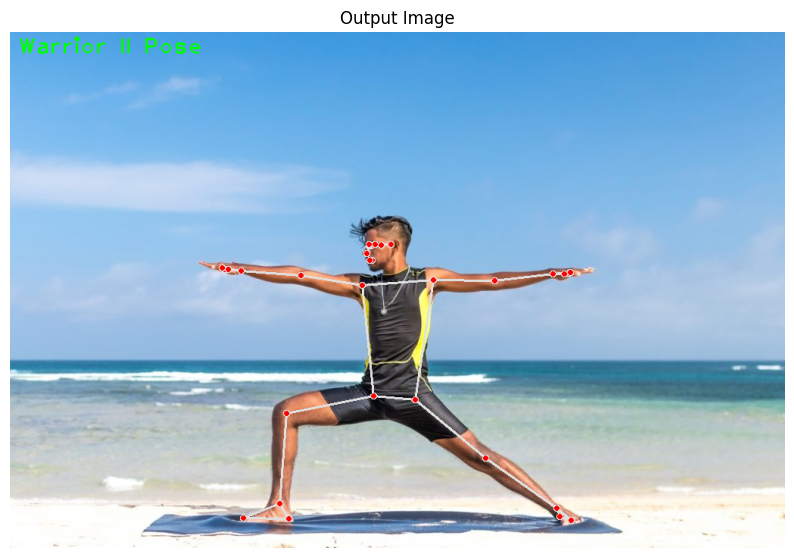

In [19]:
# GitHub URL of the image
url5 = 'https://github.com/toanmolsharma/newprojecty/blob/main/media/warriorIIpose.jpg?raw=true'

 #Read the image from the URL
sample_img3 = read_image_from_url(url5)

# Read a sample image and perform pose classification on it.
image = cv2.imread('sample_img3')
output_image, landmarks = detectPose(sample_img3, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

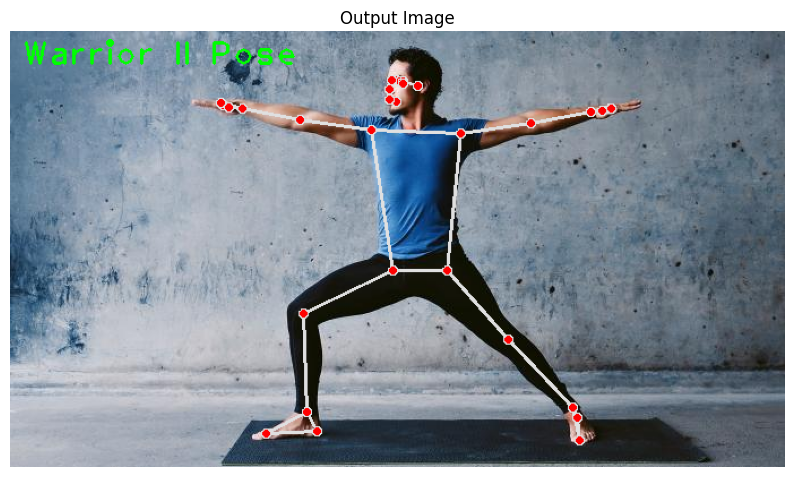

In [20]:
# GitHub URL of the image
url6 = 'https://raw.githubusercontent.com/toanmolsharma/newprojecty/main/media/warriorIIpose1.jpg'

# Read the image from the URL
sample_img4 = read_image_from_url(url6)

# Read another sample image and perform pose classification on it.
image = cv2.imread('sample_img4')
output_image, landmarks = detectPose(sample_img4, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

## **<font style="color:rgb(134,19,348)">Tree Pose</font>**


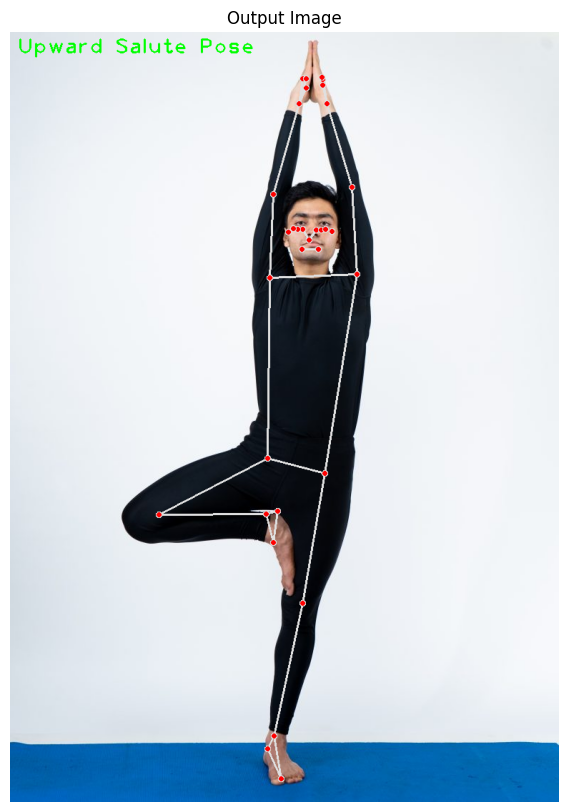

In [21]:
# GitHub URL of the image (raw URL)
url7 = 'https://raw.githubusercontent.com/toanmolsharma/newprojecty/main/media/treepose.jpg'

# Read the image from the URL
sample_img5 = read_image_from_url(url7)

# Read a sample image and perform pose classification on it.
image = cv2.imread('sample_img5')
output_image, landmarks = detectPose(sample_img5, mp_pose.Pose(static_image_mode=True,
                                         min_detection_confidence=0.5, model_complexity=0), display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

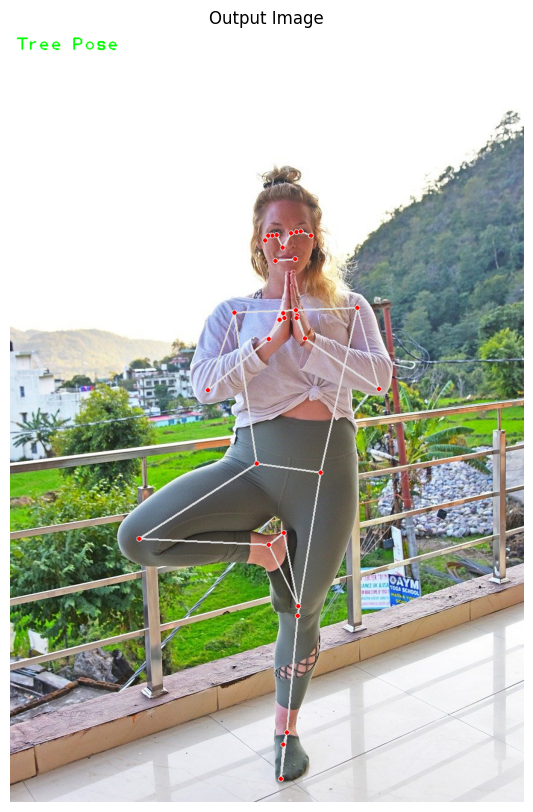

In [22]:
# GitHub URL of the image (raw URL)
url8 = 'https://raw.githubusercontent.com/toanmolsharma/newprojecty/main/media/treepose1.jpg'

# Read the image from the URL
sample_img6 = read_image_from_url(url8)

# Read another sample image and perform pose classification on it.
image = cv2.imread('sample_img6')
output_image, landmarks = detectPose(sample_img6, mp_pose.Pose(static_image_mode=True,
                                         min_detection_confidence=0.5, model_complexity=1), display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

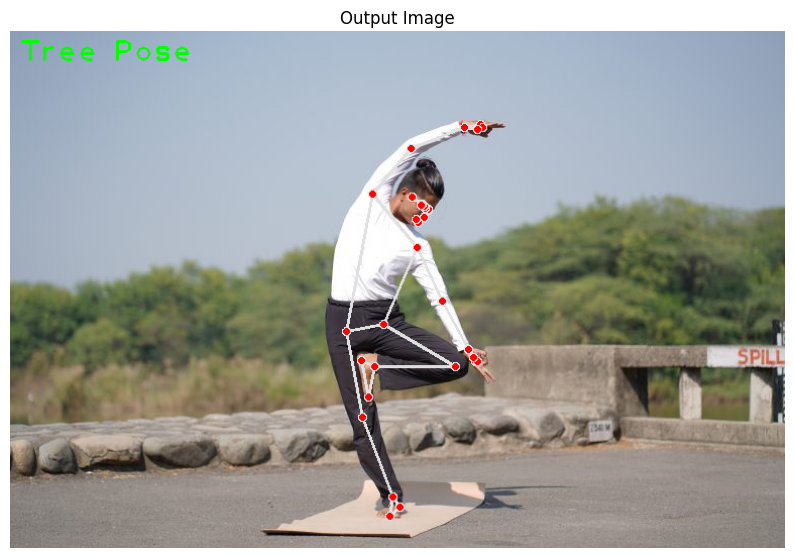

In [23]:
# GitHub URL of the image (raw URL)
url9 = 'https://raw.githubusercontent.com/toanmolsharma/newprojecty/main/media/treepose2.jpg'

# Read the image from the URL
sample_img7 = read_image_from_url(url9)

# Read another sample image and perform pose classification on it.
image = cv2.imread('sample_img7')
output_image, landmarks = detectPose(sample_img7, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

## **<font style="color:rgb(134,19,348)">T Pose</font>**


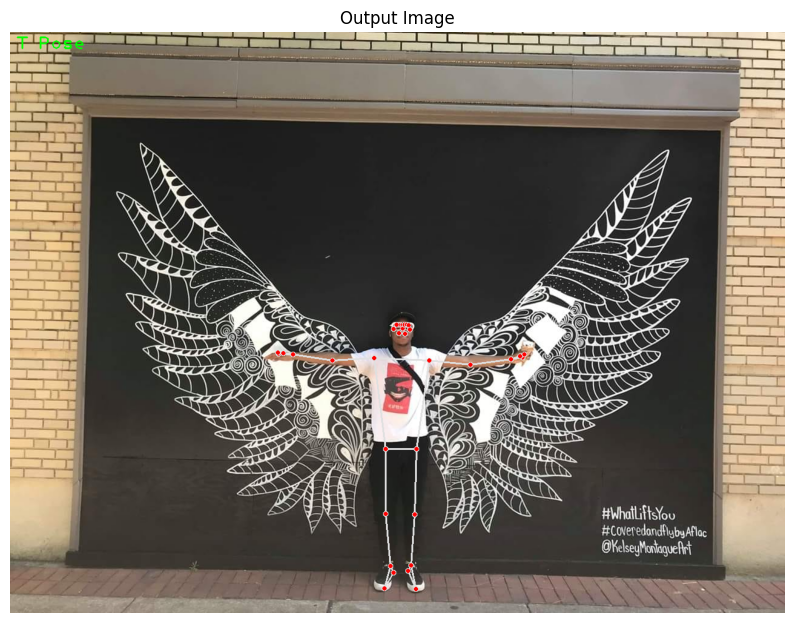

In [24]:
# GitHub URL of the image (raw URL)
url10 = 'https://raw.githubusercontent.com/toanmolsharma/newprojecty/main/media/Tpose.jpg'

# Read the image from the URL
sample_img8 = read_image_from_url(url10)

# Read another sample image and perform pose classification on it.
image = cv2.imread('sample_img8')
output_image, landmarks = detectPose(sample_img8, mp_pose.Pose(static_image_mode=True,
                                         min_detection_confidence=0.5, model_complexity=2), display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

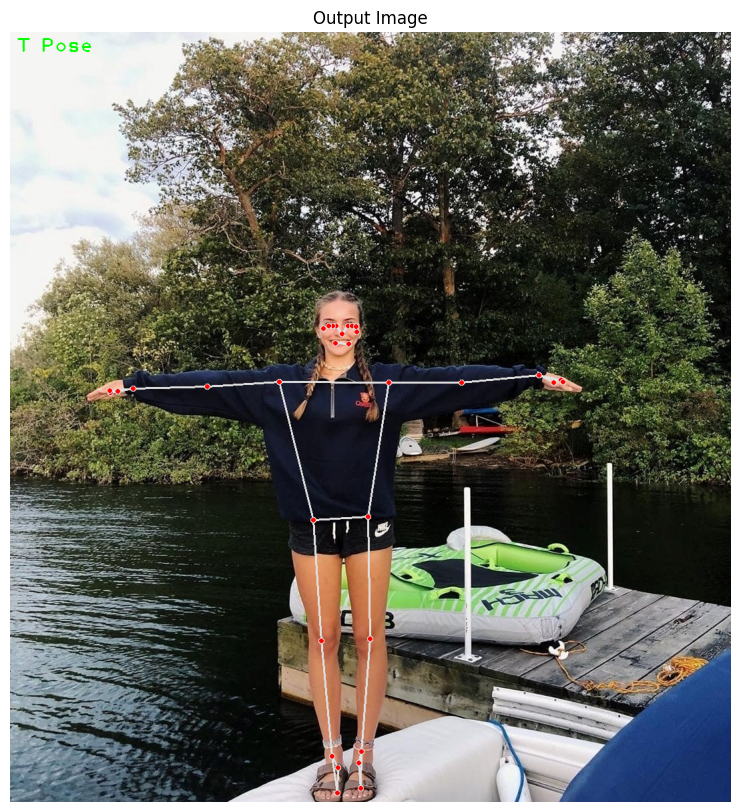

In [25]:
# GitHub URL of the image (raw URL)
url11 = 'https://raw.githubusercontent.com/toanmolsharma/newprojecty/main/media/Tpose1.jpg'

# Read the image from the URL
sample_img9 = read_image_from_url(url11)

# Read another sample image and perform pose classification on it.
image = cv2.imread('sample_img9')
output_image, landmarks = detectPose(sample_img9, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

## **<font style="color:rgb(134,19,348)">Hands Under Feet Pose</font>**

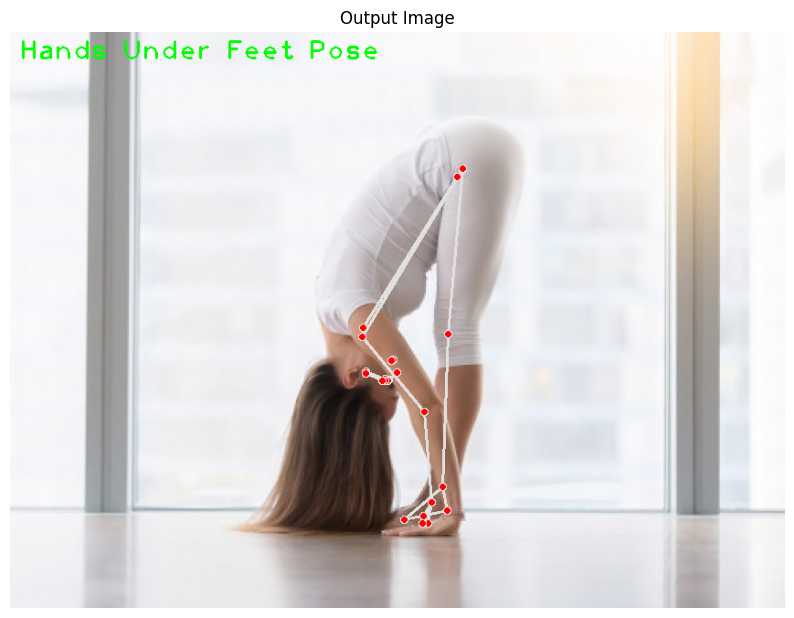

In [26]:
# GitHub URL of the image (raw URL)
url12 = 'https://raw.githubusercontent.com/toanmolsharma/newprojecty/main/media/handunderfeetpose.jpg'

# Read the image from the URL
sample_img10 = read_image_from_url(url12)

# Read another sample image and perform pose classification on it.
image = cv2.imread('sample_img10')
output_image, landmarks = detectPose(sample_img10, mp_pose.Pose(static_image_mode=True,
                                         min_detection_confidence=0.5, model_complexity=0), display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

## **<font style="color:rgb(134,19,348)">Upwards Salute Pose</font>**

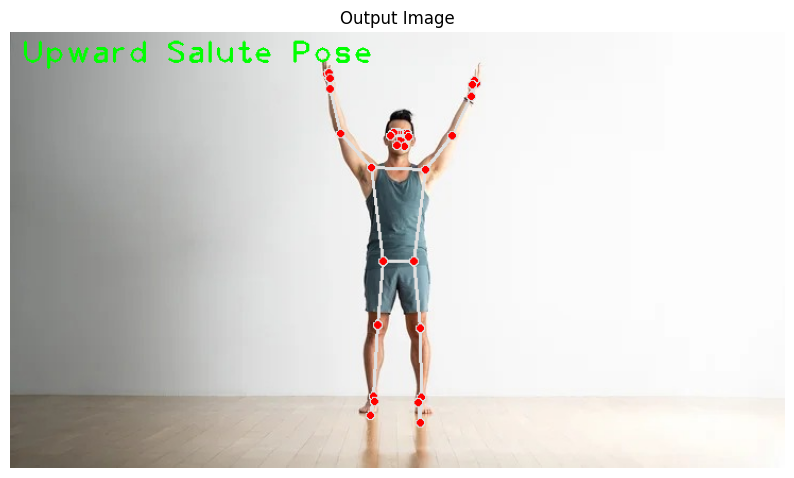

In [27]:
# GitHub URL of the image (raw URL)
url13 = 'https://raw.githubusercontent.com/toanmolsharma/newprojecty/main/media/upwardsalutepose.jpg'

# Read the image from the URL
sample_img11 = read_image_from_url(url13)

# Read another sample image and perform pose classification on it.
image = cv2.imread('sample_img11')
output_image, landmarks = detectPose(sample_img11, mp_pose.Pose(static_image_mode=True,
                                         min_detection_confidence=0.5, model_complexity=0), display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

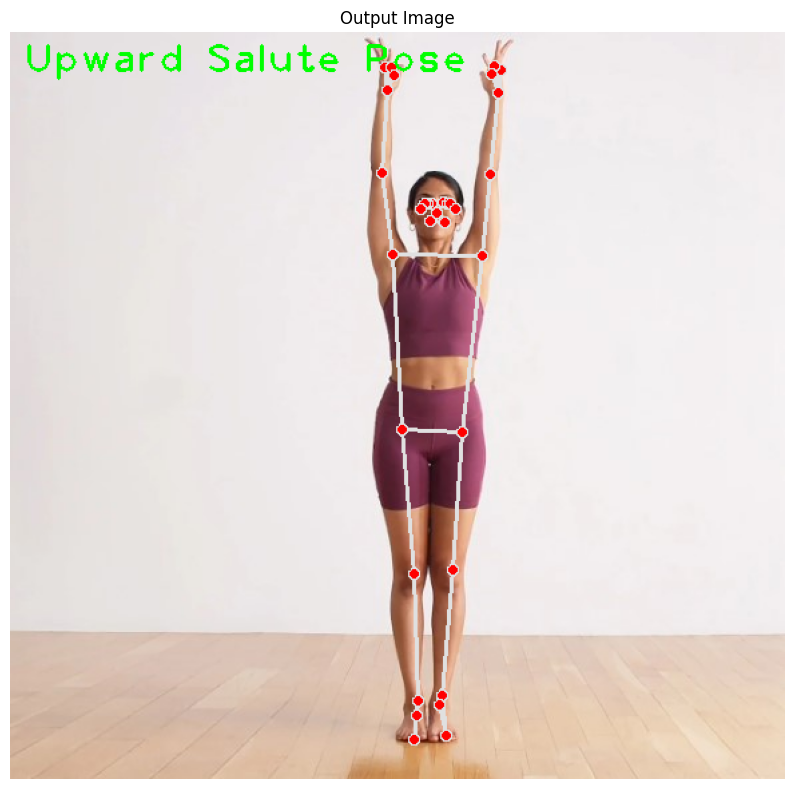

In [28]:
# GitHub URL of the image (raw URL)
url14 = 'https://raw.githubusercontent.com/toanmolsharma/newprojecty/main/media/halfmoonpose.jpg'

# Read the image from the URL
sample_img12 = read_image_from_url(url14)

# Read another sample image and perform pose classification on it.
image = cv2.imread('sample_img12')
output_image, landmarks = detectPose(sample_img12, mp_pose.Pose(static_image_mode=True,
                                         min_detection_confidence=0.5, model_complexity=0), display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

### **<font style="color:rgb(134,19,348)">Pose Classification On Real-Time Webcam Feed</font>**

In [29]:
import mediapipe as mp
# Setup Pose function for video.
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, model_complexity=1)

# Initialize the VideoCapture object to read from the webcam.
camera_video = cv2.VideoCapture(0)
camera_video.set(3,1280)
camera_video.set(4,960)

# Initialize a resizable window.
cv2.namedWindow('Pose Classification', cv2.WINDOW_NORMAL)

# Iterate until the webcam is accessed successfully.
while camera_video.isOpened():

    # Read a frame.
    ok, frame = camera_video.read()

    # Check if frame is not read properly.
    if not ok:

        # Continue to the next iteration to read the next frame and ignore the empty camera frame.
        continue

    # Flip the frame horizontally for natural (selfie-view) visualization.
    frame = cv2.flip(frame, 1)

    # Get the width and height of the frame
    frame_height, frame_width, _ =  frame.shape

    # Resize the frame while keeping the aspect ratio.
    frame = cv2.resize(frame, (int(frame_width * (640 / frame_height)), 640))

    # Perform Pose landmark detection.
    frame, landmarks = detectPose(frame, pose_video, display=False)

    # Check if the landmarks are detected.
    if landmarks:

        # Perform the Pose Classification.
        frame, _ = classifyPose(landmarks, frame, display=False)

    # Display the frame.
    cv2.imshow('Pose Classification', frame)

    # Wait until a key is pressed.
    # Retreive the ASCII code of the key pressed
    k = cv2.waitKey(1) & 0xFF

    # Check if 'ESC' is pressed.
    if(k == 27):

        # Break the loop.
        break

# Release the VideoCapture object and close the windows.
camera_video.release()
cv2.destroyAllWindows()